In [76]:

import numpy as np
import pandas as pd

In [77]:
df = pd.read_csv("spam.csv", encoding="latin1")

In [78]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1907,ham,ELLO BABE U OK?,NaN,NaN,NaN
3004,ham,Ew are you one of them?,NaN,NaN,NaN
4415,ham,V skint too but fancied few bevies.waz gona go...,NaN,NaN,NaN
1332,ham,It's ok lar. U sleep early too... Nite...,NaN,NaN,NaN
3122,ham,He telling not to tell any one. If so treat fo...,NaN,NaN,NaN


In [79]:
df.shape

(5572, 5)

Data Cleaning


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [81]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [82]:
df.sample(5)

,v1,v2
3188,ham,X2 &lt;#&gt; . Are you going to get that
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g..."
2932,ham,Yo do you know anyone &lt;#&gt; or otherwise...
2273,ham,Cold. Dont be sad dear
2428,ham,She.s find. I sent you an offline message to k...


In [83]:
# renaming the column 1 and 2
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
41,ham,"Did I forget to tell you ? I want you , I need..."
1957,ham,Take something for pain. If it moves however t...
2601,ham,Okie
2177,ham,Oh k :)why you got job then whats up?
644,ham,Allo! We have braved the buses and taken on th...


In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [85]:
df['target'] = encoder.fit_transform(df['target'])
#converting the ham into 0 and spam into 1

In [86]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [88]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [89]:
# removing duplicate values
df = df.drop_duplicates(keep='first')

In [90]:
df.duplicated().sum()

np.int64(0)

In [91]:
df.shape

(5169, 2)

EDA

In [92]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

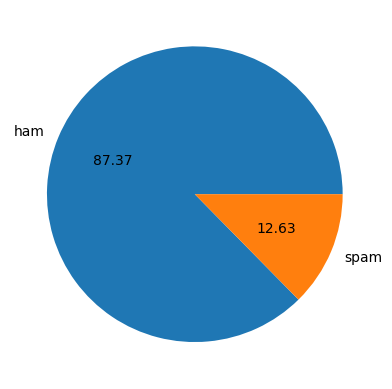

In [94]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [95]:
import nltk

In [96]:
!pip install nltk

In [97]:
nltk.download()
nltk.download('punkt')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guest_123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:

df['num_characters'] = df['text'].apply(len)

In [99]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [100]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [101]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guest_123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [103]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [104]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [105]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [106]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [107]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [108]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [109]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

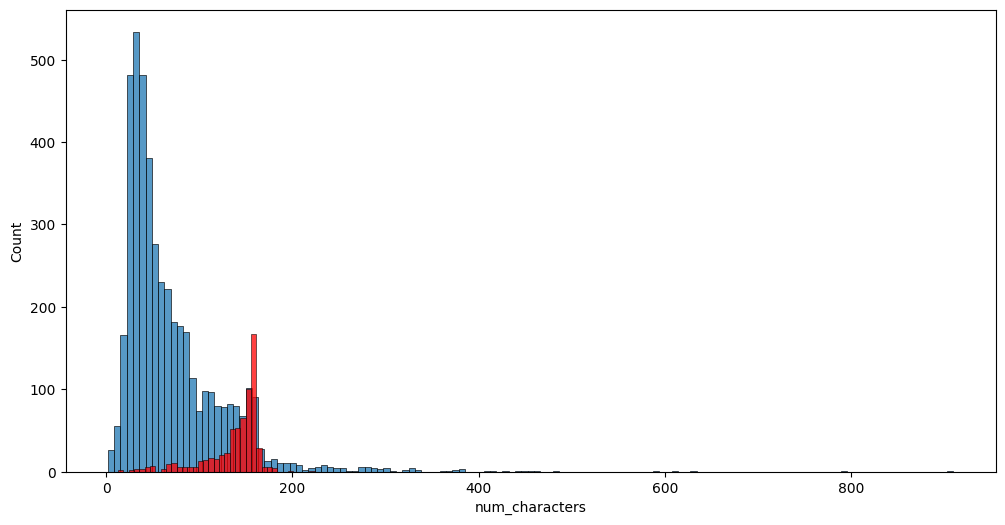

In [110]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

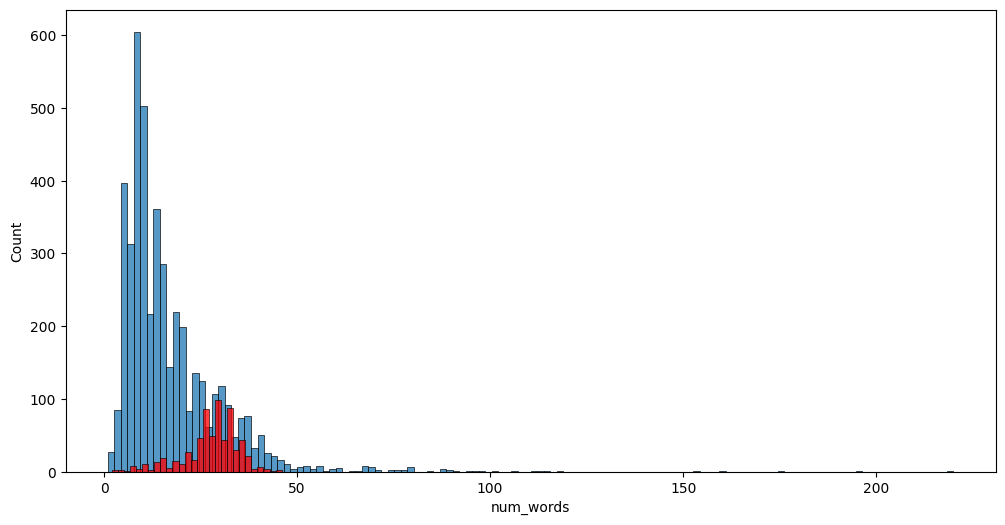

In [111]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

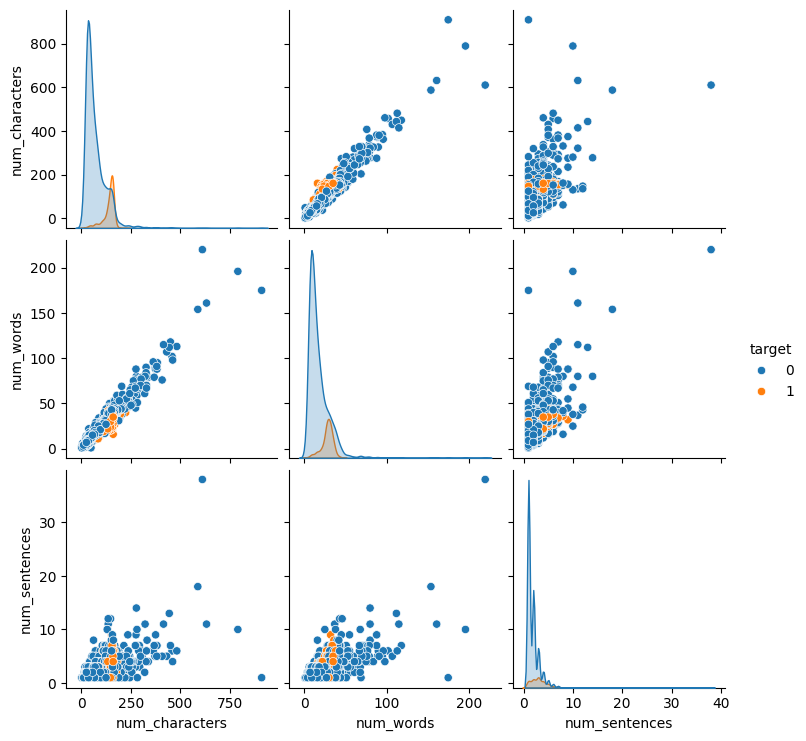

In [112]:
sns.pairplot(df,hue='target')

In [113]:
numeric_df = df.select_dtypes(include=['number'])


<Axes: >

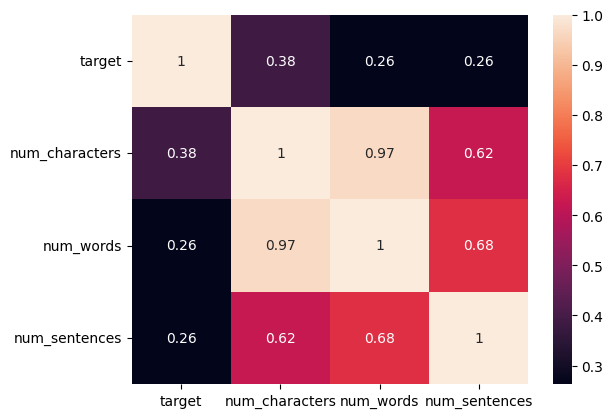

In [114]:
sns.heatmap(numeric_df.corr(),annot=True)

DATA PREPROCESSING

CONVERTION TO LOWER CASE

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [115]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Function to clean and preprocess text
def transform_text(text):
    # LOWERCASE
    text = text.lower()

    #REMOVE SPECIAL CHARACTERS
    text = re.sub(r'[^a-z\s]', '', text)

    #TOkenization
    words = word_tokenize(text)

    # stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    # Join words
    return ' '.join(words)


text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
print(transform_text(text))

im gon na home soon dont want talk stuff anymor tonight k ive cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guest_123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guest_123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [116]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today'

In [117]:
from gettext import install

import pip
pip 
install 
nltk

<module 'nltk' from 'c:\\Users\\guest_123\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\nltk\\__init__.py'>

In [118]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [119]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [120]:
df['transformed_text'] = df['text'].apply(transform_text)

In [121]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [122]:
import pip
import wordcloud
pip 
install 
wordcloud

<module 'wordcloud' from 'c:\\Users\\guest_123\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\wordcloud\\__init__.py'>

In [123]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [124]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [125]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

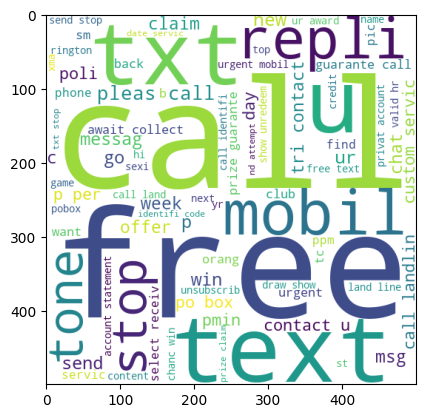

In [126]:
plt.imshow(spam_wc)

In [127]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

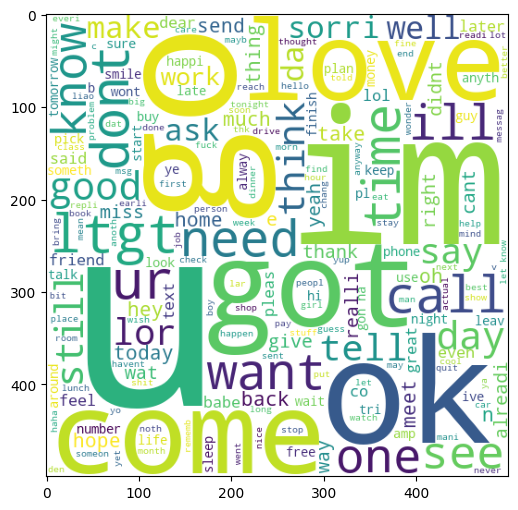

In [128]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [130]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [131]:
len(spam_corpus)

9219

In [132]:
from collections import Counter

In [133]:
word_counts = Counter(spam_corpus).most_common(30)

In [134]:
label = df
label= pd.DataFrame(word_counts, columns=['word', 'count'])

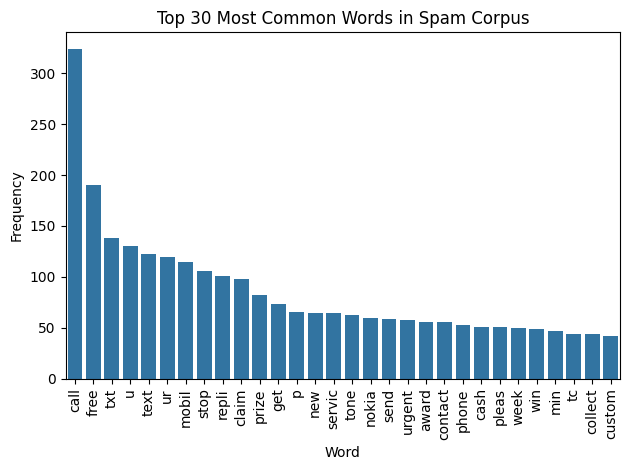

In [135]:
sns.barplot(x='word', y='count', data=label)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [136]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [137]:
print(df.columns)

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [138]:
print(label.columns)

Index(['word', 'count'], dtype='object')


In [139]:
len(ham_corpus)

36050

In [140]:
word_count2= Counter(ham_corpus).most_common(30)

In [141]:
label2 = df
label2 = pd.DataFrame(word_count2, columns=['word', 'count'])

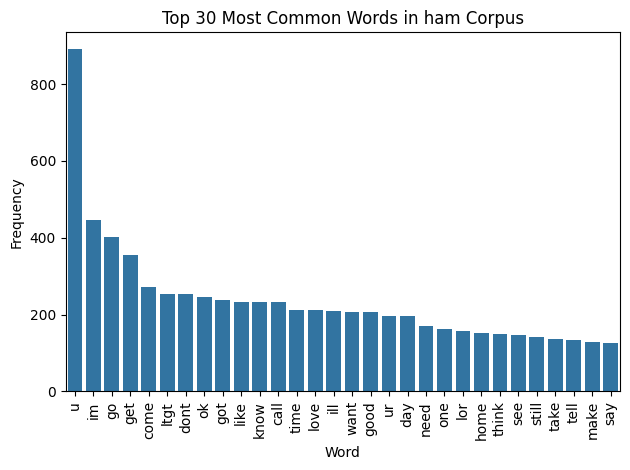

In [142]:
sns.barplot(x='word', y='count', data=label2)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in ham Corpus')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [143]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


Model Building

In [144]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [145]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your CSV (you already have spam.csv)
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Optional: preprocess your text if needed (e.g., using your transform_text function)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)



,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [158]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [159]:
X.shape

(5169, 3000)

In [164]:
X = df['text'].values
y = df['label'].values

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [167]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and clean dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df = df.dropna()
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['text']
y = df['label']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# TF-IDF vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()   # toarray() is needed for GaussianNB
X_test_tfidf = tfidf.transform(X_test).toarray()

# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tfidf, y_train)

# Predict
y_pred = gnb.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

Accuracy: 0.8905829596412556
[[864  93]
 [ 29 129]]
0.581081081081081


In [ ]:

# Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Prediction and accuracy
y_pred2 = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

Accuracy: 0.9461883408071748
[[957   0]
 [ 60  98]]
1.0


In [176]:

# Train BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred3 = bnb.predict(X_test_tfidf)
print("Accuracy (BernoulliNB):", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


Accuracy (BernoulliNB): 0.968609865470852
[[956   1]
 [ 34 124]]
0.992



# tfidf --> MNB     as the precision score of monomial NV is better than the other two and here in this dataset we will mainly focus on the precision rather than accuracy

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier # type: ignore

In [182]:
#!pip install xgboost 

In [183]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [184]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [185]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9700193423597679, 0.9572649572649573)

In [188]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train_tfidf,y_train,X_test_tfidf,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97847533632287
Precision -  0.9926470588235294
For  KN
Accuracy -  0.905829596412556
Precision -  1.0
For  NB
Accuracy -  0.9461883408071748
Precision -  1.0
For  DT
Accuracy -  0.9372197309417041
Precision -  0.860655737704918
For  LR
Accuracy -  0.9542600896860987
Precision -  0.9572649572649573
For  RF
Accuracy -  0.9641255605381166
Precision -  1.0
For  AdaBoost
Accuracy -  0.9381165919282511
Precision -  0.9587628865979382
For  BgC
Accuracy -  0.9659192825112107
Precision -  0.9615384615384616
For  ETC
Accuracy -  0.9704035874439462
Precision -  1.0
For  GBDT
Accuracy -  0.9497757847533632
Precision -  0.9811320754716981
For  xgb
Accuracy -  0.9668161434977578
Precision -  0.9763779527559056


In [189]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [190]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905830,1.000000
2,NB,0.946188,1.000000
5,RF,0.964126,1.000000
8,ETC,0.970404,1.000000
0,SVC,0.978475,0.992647
9,GBDT,0.949776,0.981132
10,xgb,0.966816,0.976378
7,BgC,0.965919,0.961538
6,AdaBoost,0.938117,0.958763
4,LR,0.954260,0.957265


In [191]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [192]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905830
1,NB,Accuracy,0.946188
2,RF,Accuracy,0.964126
3,ETC,Accuracy,0.970404
4,SVC,Accuracy,0.978475
5,GBDT,Accuracy,0.949776
6,xgb,Accuracy,0.966816
7,BgC,Accuracy,0.965919
8,AdaBoost,Accuracy,0.938117
9,LR,Accuracy,0.954260


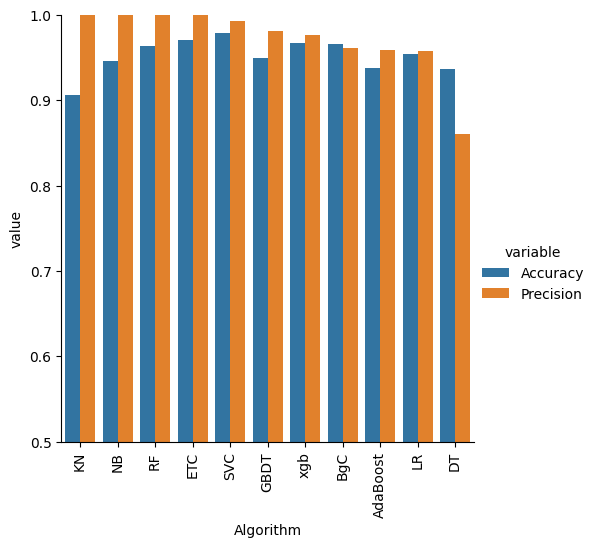

In [193]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


# model improve
# 1. Change the max_features parameter of TfIdf

In [194]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [195]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [196]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [197]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [198]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [199]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905830,1.000000,0.905830,1.000000,0.905830,1.000000,0.905830,1.000000
1,NB,0.946188,1.000000,0.946188,1.000000,0.946188,1.000000,0.946188,1.000000
2,RF,0.964126,1.000000,0.964126,1.000000,0.964126,1.000000,0.964126,1.000000
3,ETC,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000
4,SVC,0.978475,0.992647,0.978475,0.992647,0.978475,0.992647,0.978475,0.992647
5,GBDT,0.949776,0.981132,0.949776,0.981132,0.949776,0.981132,0.949776,0.981132
6,xgb,0.966816,0.976378,0.966816,0.976378,0.966816,0.976378,0.966816,0.976378
7,BgC,0.965919,0.961538,0.965919,0.961538,0.965919,0.961538,0.965919,0.961538
8,AdaBoost,0.938117,0.958763,0.938117,0.958763,0.938117,0.958763,0.938117,0.958763
9,LR,0.954260,0.957265,0.954260,0.957265,0.954260,0.957265,0.954260,0.957265


In [200]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [201]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [203]:
voting.fit(X_train_tfidf,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [206]:

y_pred = voting.predict(X_test_tfidf)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748878923766816
Precision 1.0


In [207]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [208]:
from sklearn.ensemble import StackingClassifier

In [209]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [212]:
clf.fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9829596412556054
Precision 0.986013986013986


In [213]:
import pickle

# Save the tfidf vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Save the model (MultinomialNB in this case)
pickle.dump(mnb, open('model.pkl', 'wb'))